In [4]:
# Import packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import hamming_loss

In [10]:
# Import data
data = pd.read_csv('../recipe_ingredients_dataset/ingredient_df_with_recipenames.csv', index_col = 0)

# Remove categorical columns 
recipes_ingredients_matrix = data.select_dtypes(include=[np.number])

In [12]:
# Convert binary recipe matrix to float
recipes_ingredients_matrix_float = recipes_ingredients_matrix.astype(np.float64)

In [13]:
hamming_dists = []

# Number of components for Truncated SVD
n_components_test = [100, 500, 1000, 1500, 2000, 3000]

for k in n_components_test:
    # Run Truncated SVD with randomized algorithm for optimal k vectors
    truncated_svd = TruncatedSVD(n_components=k, algorithm='randomized', random_state=42)

    # Fit and transform the data to reduce its dimensions
    X_reduced = truncated_svd.fit_transform(recipes_ingredients_matrix_float)

    # Reconstruct the matrix from the reduced dimensions
    X_reconstructed = truncated_svd.inverse_transform(X_reduced)

    # Binarize the reconstructed matrix by applying a threshold
    X_binarized = np.where(X_reconstructed >= 0.5, 1, 0)

    # Flatten the original DataFrame and the reconstructed numpy array into 1D arrays
    flat_original = recipes_ingredients_matrix.values.flatten()
    flat_reconstructed = X_binarized.flatten()

    # Calculate the Hamming distance as the total count of mismatches
    hamming_dist = np.sum(flat_original != flat_reconstructed)

    
    hamming_dists.append(hamming_dist)

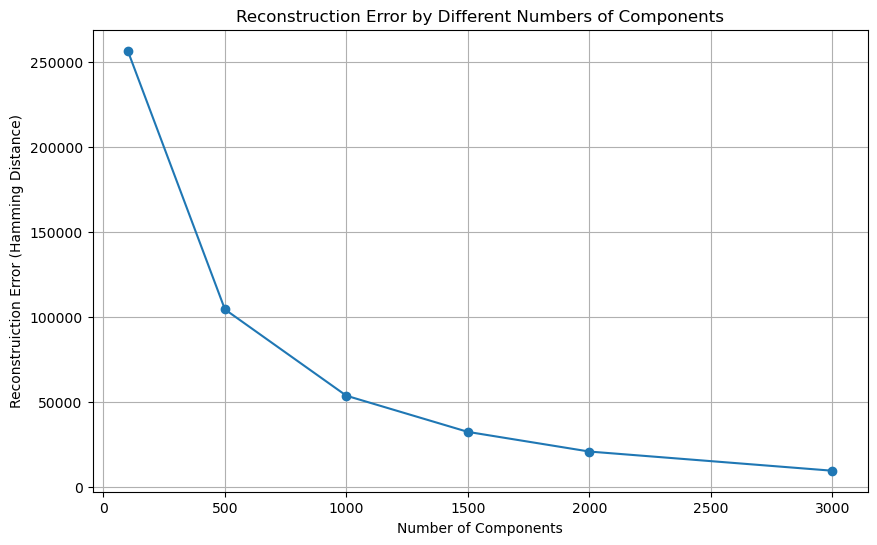

In [14]:
# Plotting the Hamming DIstance
plt.figure(figsize=(10, 6))
plt.plot(n_components_test, hamming_dists, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruiction Error (Hamming Distance)')
plt.title('Reconstruction Error by Different Numbers of Components')
plt.grid(True)
plt.show()

In [56]:
# Plotting the Hamming Distance as percentage
plt.figure(figsize=(10, 6))
plt.plot(n_components_test, hamming_dists/(49718 * 7140), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruiction Error (Hamming Distance)')
plt.title('Reconstruction Error by Different Numbers of Components')
plt.grid(True)
plt.show()

TypeError: unsupported operand type(s) for /: 'list' and 'int'

<Figure size 1000x600 with 0 Axes>

In [15]:
hamming_dists

[256549, 104318, 53526, 32242, 20676, 9393]

In [17]:
# SVD with 1000 components
truncated_svd_1000 = TruncatedSVD(n_components= 1000, algorithm='randomized', random_state=42)

# Fit and transform the data to reduce its dimensions
X_reduced_1000 = truncated_svd_1000.fit_transform(recipes_ingredients_matrix_float)

In [18]:
# SVD with 1000 components
truncated_svd_500 = TruncatedSVD(n_components= 500, algorithm='randomized', random_state=42)

# Fit and transform the data to reduce its dimensions
X_reduced_500 = truncated_svd_500.fit_transform(recipes_ingredients_matrix_float)

In [22]:
# V^T is already provided correctly by the model
Vt_500 = truncated_svd_500.components_ 

singular_values_500 = truncated_svd_500.singular_values_  

# Calculating U 
U_500 = X_reduced_500 / singular_values_500[np.newaxis, :]  

# Calculating V 
V_500 = Vt_500.T  

In [24]:
V_500.shape

(7137, 500)

In [25]:
U_500.shape

(49718, 500)

In [26]:
# V^T is already provided correctly by the model
Vt_1000 = truncated_svd_1000.components_ 

singular_values_1000 = truncated_svd_1000.singular_values_  

# Calculating U 
U_1000 = X_reduced_1000 / singular_values_1000[np.newaxis, :]  

# Calculating V 
V_1000 = Vt_1000.T  

In [27]:
V_1000.shape

(7137, 1000)

In [28]:
U_1000.shape

(49718, 1000)

In [29]:
# Convert U and V matrix to dataframes
U_df_500 = pd.DataFrame(U_500, columns=[f'U_{i+1}' for i in range(500)])
V_df_500 = pd.DataFrame(V_500, columns=[f'V_{i+1}' for i in range(500)])
U_df_1000 = pd.DataFrame(U_1000, columns=[f'U_{i+1}' for i in range(1000)])
V_df_1000 = pd.DataFrame(V_1000, columns=[f'V_{i+1}' for i in range(1000)])

In [30]:
U_df_500

,U_1,U_2,U_3,U_4,U_5,U_6,U_7,U_8,U_9,U_10,...,U_491,U_492,U_493,U_494,U_495,U_496,U_497,U_498,U_499,U_500
0,0.003018,-0.005585,-0.005941,0.011068,0.001674,-0.001072,-0.000115,0.001481,0.002628,-4.118856e-03,...,0.001383,-0.000860,-0.002431,0.002265,-0.000853,-0.002287,0.001589,0.003412,-0.004037,0.006266
1,0.006423,-0.003791,-0.000963,-0.005858,0.000699,-0.004992,0.006912,0.006845,-0.010570,6.437596e-03,...,0.003568,-0.001127,-0.007057,-0.001598,-0.006735,0.000742,-0.010997,-0.006608,0.000511,-0.002178
2,0.005095,0.006193,-0.001735,-0.003395,0.002115,0.000920,0.001309,-0.000396,0.010043,2.772871e-03,...,-0.001881,0.001861,-0.002404,0.015367,0.015498,-0.010095,0.002344,-0.006235,-0.011282,-0.007944
3,0.003229,-0.002683,0.011464,0.000654,0.006566,-0.006241,0.005082,-0.001922,0.008543,-1.695920e-03,...,-0.000358,-0.000061,-0.001450,-0.002566,0.000025,-0.001426,-0.001181,-0.000735,-0.000100,-0.002131
4,0.000011,0.000065,0.000028,0.000053,0.000050,0.000040,-0.000040,-0.000042,-0.000086,4.395533e-07,...,0.002170,-0.000793,0.003584,0.000115,0.002487,-0.000844,0.002731,0.001582,0.000477,0.000049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49713,0.001463,0.002167,-0.000718,0.002216,0.002228,0.001994,0.000939,0.000197,0.000164,1.466935e-03,...,0.009722,0.019893,-0.012065,-0.001962,-0.011399,-0.006778,0.001766,-0.001377,-0.004023,-0.011542
49714,0.003573,-0.007119,0.004219,-0.004935,0.004054,0.007327,-0.000547,-0.002138,0.002444,-7.116252e-03,...,0.006518,-0.002031,-0.000993,0.003699,-0.005229,-0.002606,0.001663,-0.006907,0.004067,-0.007433
49715,0.000601,-0.000997,-0.000100,0.000665,-0.000637,-0.000894,0.002493,0.000649,-0.002800,6.249260e-03,...,0.000395,0.002451,-0.000785,0.001079,-0.002513,0.000548,0.000433,-0.000870,-0.000312,0.002034
49716,0.008007,-0.004423,0.007350,-0.009117,-0.005501,0.003876,-0.005548,0.003388,-0.006944,-2.043586e-03,...,0.001804,-0.001966,-0.006704,-0.001691,0.004711,0.001802,0.001760,-0.003303,-0.001682,0.006018


In [31]:
V_df_1000

,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,...,V_991,V_992,V_993,V_994,V_995,V_996,V_997,V_998,V_999,V_1000
0,7.497525e-06,-1.716096e-05,-7.582991e-06,2.017027e-05,3.213235e-05,7.171558e-06,3.991467e-05,1.019017e-04,-1.634608e-05,-2.761700e-05,...,-0.000130,-0.000079,-0.000260,-0.000250,0.000062,0.000256,-0.000054,0.000152,-0.000045,-0.000103
1,1.492478e-04,-3.667314e-04,-3.382071e-04,3.385434e-04,3.251376e-05,3.761534e-04,-1.456386e-04,-4.288973e-04,1.798500e-04,-4.794320e-04,...,0.003077,0.002004,-0.002244,0.002683,-0.002569,0.001136,-0.001868,0.001749,-0.001511,0.001173
2,1.788524e-06,-1.122439e-06,4.825371e-06,6.813478e-06,4.892821e-06,-2.856048e-06,1.223465e-05,1.286283e-06,-1.976113e-05,3.086197e-05,...,0.002144,-0.004782,-0.003783,0.000306,-0.004856,0.002453,0.000995,-0.002909,0.001057,0.002255
3,1.764680e-05,-5.659079e-05,-1.510727e-05,1.975139e-05,5.940448e-05,9.001717e-05,-2.001373e-05,-5.158064e-05,-2.165914e-05,6.141479e-05,...,0.000001,0.000484,0.000119,0.000294,0.000033,-0.000188,0.000440,-0.000137,-0.000092,0.000226
4,3.954519e-04,-3.706510e-04,4.917712e-04,-5.431741e-04,-4.616242e-04,4.919497e-04,2.325070e-04,7.174175e-05,-8.364415e-04,2.594944e-04,...,0.001880,-0.002491,0.004377,-0.001600,0.005041,0.002425,0.002819,-0.001755,0.004098,-0.001920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7132,1.728348e-06,3.776072e-06,7.666237e-06,7.074346e-06,5.847724e-06,-4.801549e-06,4.555082e-06,-5.453041e-07,8.083073e-06,7.493418e-06,...,-0.000277,0.001800,0.000800,0.001112,-0.002948,0.001743,-0.000449,0.000707,0.002967,0.001774
7133,2.307512e-08,-2.356600e-08,-9.466343e-09,-3.287265e-08,-5.414296e-08,2.635999e-07,-2.120698e-08,3.394067e-09,1.469643e-07,-1.862109e-07,...,0.000506,-0.000569,-0.000121,0.000821,-0.000538,0.000414,0.001461,-0.000677,-0.000621,0.000724
7134,5.871647e-04,-6.765148e-05,-1.130876e-05,-5.807626e-04,2.467652e-05,3.078561e-05,5.827816e-04,3.737306e-04,-8.812226e-04,6.944994e-04,...,0.000173,0.003967,-0.001626,0.001615,-0.001202,0.003773,-0.009964,-0.005040,0.003891,-0.006595
7135,1.550646e-03,6.859990e-04,1.418886e-04,1.158854e-03,3.252598e-04,9.289532e-04,1.749722e-03,1.331416e-03,2.403362e-03,-3.699937e-04,...,-0.012116,-0.002363,0.043617,-0.007545,-0.001148,-0.000615,-0.005437,0.019049,0.005589,0.000338


In [60]:
U_df_500.to_csv('../recipe_ingredients_dataset/U_500matrix.csv')
V_df_500.to_csv('../recipe_ingredients_dataset/V_500matrix.csv')
U_df_1000.to_csv('../recipe_ingredients_dataset/U_1000matrix.csv')
V_df.to_csv('../recipe_ingredients_dataset/V_1000matrix.csv')